Importing packages used.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

First we will load all the trips tables and combine them into one. To start, we will create a list of their file names. Rather than writing all 49 file names, we can exploit pockets of consistency across certain periods of time to generate these with a loop.

In [3]:
trips_file_names = []

for i in range(9):
    
    if i == 0:
        
        trips_file_names += ['Divvy_Trips_2013']
        
    if i == 1:
        
        trips_file_names += ['Divvy_Trips_2014_Q1Q2',
                       'Divvy_Trips_2014-Q3-07',
                       'Divvy_Trips_2014-Q3-0809',
                       'Divvy_Trips_2014-Q4']
        
    if i == 2:
        
        trips_file_names += ['Divvy_Trips_2015-Q1',
                       'Divvy_Trips_2015-Q2',
                       'Divvy_Trips_2015_07',
                       'Divvy_Trips_2015_08',
                       'Divvy_Trips_2015_09',
                       'Divvy_Trips_2015_Q4']
        
    if i == 3:
        
        trips_file_names += ['Divvy_Trips_2016_Q1',
                       'Divvy_Trips_2016_04',
                       'Divvy_Trips_2016_05',
                       'Divvy_Trips_2016_06',
                       'Divvy_Trips_2016_Q3',
                       'Divvy_Trips_2016_Q4']
        
    if 3 < i < 7:
        
        trips_file_names += ['Divvy_Trips_' + str(i+2013) + '_Q' + str(j+1) for j in range(4)]
        
    if i == 7:
        
        trips_file_names += ['Divvy_Trips_2020_Q1']
        trips_file_names += ['20200' + str(j+4) + '-divvy-tripdata' for j in range(6)]
        trips_file_names += ['202005-divvy-tripdata 2']
        trips_file_names += ['2020' + str(j+10) + '-divvy-tripdata' for j in range(3)]
        
    if i == 8:
        
        trips_file_names += ['20210' + str(j+1) + '-divvy-tripdata' for j in range(9)] 
        
trips_file_names = [f + '.csv' for f in trips_file_names]

In [5]:
print(trips_file_names)

['Divvy_Trips_2013.csv', 'Divvy_Trips_2014_Q1Q2.csv', 'Divvy_Trips_2014-Q3-07.csv', 'Divvy_Trips_2014-Q3-0809.csv', 'Divvy_Trips_2014-Q4.csv', 'Divvy_Trips_2015-Q1.csv', 'Divvy_Trips_2015-Q2.csv', 'Divvy_Trips_2015_07.csv', 'Divvy_Trips_2015_08.csv', 'Divvy_Trips_2015_09.csv', 'Divvy_Trips_2015_Q4.csv', 'Divvy_Trips_2016_Q1.csv', 'Divvy_Trips_2016_04.csv', 'Divvy_Trips_2016_05.csv', 'Divvy_Trips_2016_06.csv', 'Divvy_Trips_2016_Q3.csv', 'Divvy_Trips_2016_Q4.csv', 'Divvy_Trips_2017_Q1.csv', 'Divvy_Trips_2017_Q2.csv', 'Divvy_Trips_2017_Q3.csv', 'Divvy_Trips_2017_Q4.csv', 'Divvy_Trips_2018_Q1.csv', 'Divvy_Trips_2018_Q2.csv', 'Divvy_Trips_2018_Q3.csv', 'Divvy_Trips_2018_Q4.csv', 'Divvy_Trips_2019_Q1.csv', 'Divvy_Trips_2019_Q2.csv', 'Divvy_Trips_2019_Q3.csv', 'Divvy_Trips_2019_Q4.csv', 'Divvy_Trips_2020_Q1.csv', '202004-divvy-tripdata.csv', '202005-divvy-tripdata.csv', '202006-divvy-tripdata.csv', '202007-divvy-tripdata.csv', '202008-divvy-tripdata.csv', '202009-divvy-tripdata.csv', '202005-

Now we will load each of these files as a pandas dataframe and store the dataframes in a list.

In [6]:
trips_dataframes = [pd.read_csv('/Users/edanberrett/Desktop/Cyclistic Project/' + f,encoding = "ISO-8859-1",low_memory=False) for f in trips_file_names]

In [7]:
print(trips_dataframes[0].sample())

        trip_id         starttime          stoptime  bikeid  tripduration  \
584477   898749  2013-11-01 07:50  2013-11-01 08:03      11           755   

        from_station_id             from_station_name  to_station_id  \
584477               91  Clinton St & Washington Blvd            199   

               to_station_name    usertype gender  birthday  
584477  Wabash Ave & Grand Ave  Subscriber   Male    1960.0  


Now we will create a list with all the column names of every table in it, then count the number of instances of each unique element.

In [8]:
trips_column_lists = [list(df.columns) for df in trips_dataframes]
trips_all_column_names = [y for x in trips_column_lists for y in x]

In [9]:
def unique_count(L):
    
    counts = {}
    
    for x in set(L):
        
        counts.update({x:len([y for y in L if y == x])})
        
    return counts

print(unique_count(trips_all_column_names))

{'started_at': 20, 'gender': 27, 'from_station_id': 27, 'Member Gender': 2, '01 - Rental Details Bike ID': 2, 'end_time': 10, 'birthday': 1, '01 - Rental Details Duration In Seconds Uncapped': 2, 'ended_at': 20, 'bikeid': 27, 'member_casual': 20, 'rideable_type': 20, 'end_station_name': 20, 'start_station_name': 20, '01 - Rental Details Local Start Time': 2, 'usertype': 27, '03 - Rental Start Station Name': 2, '02 - Rental End Station Name': 2, '01 - Rental Details Rental ID': 2, 'end_station_id': 20, 'starttime': 17, 'end_lat': 20, 'start_time': 10, 'start_station_id': 20, 'stoptime': 17, '01 - Rental Details Local End Time': 2, 'end_lng': 20, 'start_lat': 20, '02 - Rental End Station ID': 2, 'birthyear': 26, '05 - Member Details Member Birthday Year': 2, 'tripduration': 27, 'ride_id': 20, 'to_station_id': 27, 'start_lng': 20, '03 - Rental Start Station ID': 2, 'User Type': 2, 'from_station_name': 27, 'trip_id': 27, 'to_station_name': 27}


Let's sort by count to make this easier.

In [10]:
print(dict(sorted(unique_count(trips_all_column_names).items(), key=lambda item: item[1])))

{'birthday': 1, 'Member Gender': 2, '01 - Rental Details Bike ID': 2, '01 - Rental Details Duration In Seconds Uncapped': 2, '01 - Rental Details Local Start Time': 2, '03 - Rental Start Station Name': 2, '02 - Rental End Station Name': 2, '01 - Rental Details Rental ID': 2, '01 - Rental Details Local End Time': 2, '02 - Rental End Station ID': 2, '05 - Member Details Member Birthday Year': 2, '03 - Rental Start Station ID': 2, 'User Type': 2, 'end_time': 10, 'start_time': 10, 'starttime': 17, 'stoptime': 17, 'started_at': 20, 'ended_at': 20, 'member_casual': 20, 'rideable_type': 20, 'end_station_name': 20, 'start_station_name': 20, 'end_station_id': 20, 'end_lat': 20, 'start_station_id': 20, 'end_lng': 20, 'start_lat': 20, 'ride_id': 20, 'start_lng': 20, 'birthyear': 26, 'gender': 27, 'from_station_id': 27, 'bikeid': 27, 'usertype': 27, 'tripduration': 27, 'to_station_id': 27, 'from_station_name': 27, 'trip_id': 27, 'to_station_name': 27}


From this, we can infer the following mapping, which we will use to convert the column names of each table to new column names such that every table follows the same convention:

In [11]:
trips_dfs_column_name_mappings = {

    'trip_id':['01 - Rental Details Rental ID',
               'ride_id',
               'trip_id'],
    
    'start_station_id':['03 - Rental Start Station ID',
                        'start_station_id',
                        'from_station_id'],
    
    'end_station_id':['02 - Rental End Station ID',
                      'end_station_id',
                      'to_station_id'],
    
    'start_station_name':['03 - Rental Start Station Name',
                          'start_station_name',
                          'from_station_name'],
    
    'end_station_name':['02 - Rental End Station Name',
                        'end_station_name',
                        'to_station_name'],
    
    'started_at':['01 - Rental Details Local Start Time',
                  'start_time',
                  'starttime',
                  'started_at'],
    
    'ended_at':['01 - Rental Details Local End Time',
                'end_time',
                'stoptime',
                'ended_at'],
    
    'user_type':['User Type',
                 'member_casual',
                 'usertype'],
    
    'age_years':['birthday',
                 '05 - Member Details Member Birthday Year',
                 'birthyear'],
    
    'gender':['Member Gender',
              'gender']
    
    }

Let's create a list of the new column names in the above mapping and add 'new' to each name to avoid duplicate column names in some tables

In [12]:
trips_dfs_new_column_names = [x + '_new' for x in trips_dfs_column_name_mappings]

In [13]:
print(trips_dfs_new_column_names)

['trip_id_new', 'start_station_id_new', 'end_station_id_new', 'start_station_name_new', 'end_station_name_new', 'started_at_new', 'ended_at_new', 'user_type_new', 'age_years_new', 'gender_new']


Now we can create the table of all trips ever, starting by creating an empty dataframe with the above columns.

In [14]:
full_trips_df = pd.DataFrame({x:[] for x in trips_dfs_new_column_names})

In [15]:
print(full_trips_df.columns)

Index(['trip_id_new', 'start_station_id_new', 'end_station_id_new',
       'start_station_name_new', 'end_station_name_new', 'started_at_new',
       'ended_at_new', 'user_type_new', 'age_years_new', 'gender_new'],
      dtype='object')


In [17]:
for df in trips_dataframes:
    
    'for each of the column names in the table of new trips, we want to find the column in the current dataframe that corresponds to this:'
    
    for name in trips_dfs_column_name_mappings:
        
        count = 0
        
        for x in list(df.columns):
            
            if x in trips_dfs_column_name_mappings[name]:
                
                new_column = pd.DataFrame({name + '_new':df[x].to_numpy()})
                
                df = pd.concat([df,new_column],axis=1)
                
                count += 1 #if a corresponding column is found
                
        'if a corresponding column is not found, add an empty column:'
                
        if count == 0:
            
            new_column = pd.DataFrame({name + '_new':['' for i in range(len(df))]})
            
            df = pd.concat([df,new_column],axis=1)
            
    'append the new part of the dataframe to the table of all trips ever'
            
    full_trips_df = full_trips_df.append(df[trips_dfs_new_column_names])

Now that we have the complete table for all trips ever, we can begin some analysis

In [153]:
trips = full_trips_df.sample(1000000)

In [23]:
print(len(trips),trips[['started_at_new','ended_at_new']].count())

100000 started_at_new    100000
ended_at_new      100000
dtype: int64


No NaNs in these columns - every trip has a start and end time

In [24]:
print(trips[['started_at_new','ended_at_new']].sample(100))

             started_at_new         ended_at_new
591081   8/25/2017 16:13:53   8/25/2017 16:31:59
169403  2021-08-13 11:59:46  2021-08-13 12:07:35
254878      6/13/2015 15:25      6/13/2015 15:45
743433  2019-08-09 18:51:27  2019-08-09 19:50:43
56204       12/13/2017 8:21      12/13/2017 8:26
...                     ...                  ...
863759  2019-08-16 11:22:31  2019-08-16 11:36:08
639008  2021-09-09 07:55:09  2021-09-09 08:17:08
136182      4/16/2016 15:45      4/16/2016 16:08
79301    12/3/2016 09:01:46   12/3/2016 09:10:54
440041    6/4/2017 16:55:14    6/4/2017 17:30:45

[100 rows x 2 columns]


Appears that date and time to minute or date and time to second is always given. Where only to minute is given, let's add a random number of seconds from 0 - 59 on the end.

In [154]:
def add_random_seconds(dt):
    
    if len(str.split(dt,':')) == 2:
        
        return dt + ':' + str(np.random.randint(0,high=60))
    
    else:
        
        return dt
    
trips['started_at_new'] = trips['started_at_new'].apply(lambda x:add_random_seconds(x))
trips['ended_at_new'] = trips['ended_at_new'].apply(lambda x:add_random_seconds(x))

In [36]:
print(trips[['started_at_new','ended_at_new']].sample(10))

              started_at_new         ended_at_new
1286855  2018-09-15 15:23:10  2018-09-15 15:37:23
544615   2019-05-25 15:54:08  2019-05-25 16:21:04
388940    10/22/2017 11:47:5   10/22/2017 11:52:0
103489   2021-03-20 10:03:05  2021-03-20 10:29:27
574674   2020-08-06 19:31:34  2020-08-06 19:42:23
272071   2018-07-17 05:46:48  2018-07-17 05:56:10
145534     3/2/2017 16:56:59    3/2/2017 17:05:22
68881     9/24/2014 17:08:12   9/24/2014 17:26:46
324070    10/30/2015 10:11:4  10/30/2015 10:26:10
995685    7/27/2016 17:24:17   7/27/2016 17:52:13


Now we can convert to datetime.

In [155]:
trips['started_at_new'] = pd.to_datetime(trips['started_at_new'])
trips['ended_at_new'] = pd.to_datetime(trips['ended_at_new'])

In [40]:
print(trips[['started_at_new','ended_at_new']].sample(10))

            started_at_new        ended_at_new
586129 2017-08-25 18:52:45 2017-08-25 19:06:48
205443 2020-09-29 16:03:16 2020-09-29 16:15:23
33840  2021-01-16 12:52:17 2021-01-16 13:02:07
536962 2016-08-25 15:24:55 2016-08-25 15:28:53
351545 2015-06-06 10:14:00 2015-06-06 10:41:48
84486  2016-05-26 15:59:07 2016-05-26 16:25:29
45539  2021-03-07 11:28:59 2021-03-07 12:01:26
410745 2021-09-10 23:01:49 2021-09-10 23:10:39
386953 2016-06-07 07:19:31 2016-06-07 07:30:07
566937 2021-09-19 01:16:04 2021-09-19 01:42:37


We are trying to answer the question "How do annual members and casual riders use Cyclistic bikes differently?". Let's investigate when the two types of users use the bikes, and how long their trips are. We can create columns for each of the year, month, hour, and day of the week that a trip began, as well as the time between start and end of the trip (duration) in minutes.

In [157]:
trips['start_year'] = trips['started_at_new'].dt.year
trips['start_month'] = trips['started_at_new'].dt.month
trips['start_hour'] = trips['started_at_new'].dt.hour
trips['duration_minutes'] = (trips['ended_at_new'] - trips['started_at_new']).dt.seconds / 60
trips['start_day_of_week'] = trips['started_at_new'].dt.dayofweek

It would be interesting to investigate distance travelled as best we can as well. Let's lookup from the most up-to-date stations table to create start_latitude, start_longitude, end_latitude, and end_longitude columns in the trips table. With these we can calculate the distance travelled as the crow flies.

In [158]:
stations = pd.read_csv('/Users/edanberrett/Desktop/Cyclistic Project/Divvy_Stations_2017_Q3Q4.csv',encoding = "ISO-8859-1",low_memory=False)

In [160]:
print(stations.sample())

      id                       name     city   latitude  longitude  \
443  480  Albany Ave & Montrose Ave  Chicago  41.961041 -87.705866   

     dpcapacity      online_date  Unnamed: 7  
443          15  2/10/2015 14:39         NaN  


In [118]:
print(stations['id'].sample(10))
print(trips[['start_station_id_new','end_station_id_new']].sample(10))
print(stations['id'].dtype)
print(trips['start_station_id_new'].dtype)
print(trips['end_station_id_new'].dtype)

0        2
242    263
222    243
198    217
541    582
96     110
193    212
174    193
554    595
539    580
Name: id, dtype: int64
        start_station_id_new end_station_id_new
46761           KA1503000052       TA1309000037
1023746                   47                 22
2196                     177                 87
66844                    303                152
412401                   334                268
303187                   291                331
211030                   144                300
432665                   334                294
1076626                   96                 56
416329                   273                 37
int64
object
object


We will need to change the 'id' column in stations and 'start_station_id_new' and 'end_station_id_new' columns in trips to string data types to make the lookup work.

In [162]:
stations['id'] = stations['id'].astype(str)
trips['start_station_id_new'] = trips['start_station_id_new'].astype(str)
trips['end_station_id_new'] = trips['end_station_id_new'].astype(str)

print(stations['id'].sample(10))
print(trips['start_station_id_new'].sample(10))
print(trips['end_station_id_new'].sample(10))

432    468
396    432
408    444
434    470
427    463
1        3
517    558
531    572
551    592
357    392
Name: id, dtype: object
304552     TA1308000019
198409            125.0
845902            299.0
1362921            33.0
964261            331.0
113134            340.0
399483            164.0
93070             304.0
677805            344.0
584162            261.0
Name: start_station_id_new, dtype: object
309487          SL-005
908403           212.0
171121           212.0
53740     TA1307000150
92092            260.0
228411           288.0
48905             69.0
588284           259.0
102417          SL-006
291830            94.0
Name: end_station_id_new, dtype: object


Looks like we will need to remove some '.0's as well now. Let's do this for all three columns to be safe.

In [163]:
def to_int_string(x):
    
    return str.split(x,'.')[0]

stations['id'] = stations['id'].apply(lambda x:to_int_string(x))
trips['start_station_id_new'] = trips['start_station_id_new'].apply(lambda x:to_int_string(x))
trips['end_station_id_new'] = trips['end_station_id_new'].apply(lambda x:to_int_string(x))

print(stations['id'].sample(10))
print(trips['start_station_id_new'].sample(10))
print(trips['end_station_id_new'].sample(10))

553    594
576    617
181    200
415    451
341    370
19      23
243    264
31      35
498    539
61      68
Name: id, dtype: object
1525930              75
100120              141
48891               253
1273256              99
617204              315
208658              198
1353470              99
216489              300
81608               324
124298     KA1503000071
Name: start_station_id_new, dtype: object
293033            13058
49660             13248
117252               60
686145              338
80862               162
7645                164
175157     TA1309000030
1097938              35
278682               50
503179               31
Name: end_station_id_new, dtype: object


Let's create two dictionaries matching station id to station latitude and station longitude.

In [164]:
stations_ids_latitudes = dict(stations[['id','latitude']].values)
stations_ids_longitudes = dict(stations[['id','longitude']].values)

Now we can create start_latitude, start_longitude, end_latitude, and end_longitude columns in the trips table by looking up from these dictionaries. If a station id in the trips table doesn't exist in the dictionaries, we will just put ''.

In [165]:
def lookup(value,table):
    
    if value in table:
    
        return table[value]
    
    else:
        
        return ''
    
trips['start_latitude'] = trips['start_station_id_new'].apply(lambda x:lookup(x,stations_ids_latitudes))
trips['start_longitude'] = trips['start_station_id_new'].apply(lambda x:lookup(x,stations_ids_longitudes))
trips['end_latitude'] = trips['end_station_id_new'].apply(lambda x:lookup(x,stations_ids_latitudes))
trips['end_longitude'] = trips['end_station_id_new'].apply(lambda x:lookup(x,stations_ids_longitudes))

In [187]:
print(trips[['start_latitude','start_longitude','end_latitude','end_longitude']].sample(30))

        start_latitude start_longitude end_latitude end_longitude
601720         41.8782         -87.632      41.8822      -87.6411
93648          41.9032        -87.6343      41.9046      -87.6406
188381         41.8892        -87.6278      41.8793      -87.6399
970428         41.8842        -87.6296      41.8847      -87.6195
611574         41.8847        -87.6195      41.8821      -87.6398
495753          41.964        -87.6382      41.9507      -87.6687
575300          41.885        -87.6128      41.8904      -87.6175
236101         41.9633        -87.6793      41.9689       -87.684
500083         41.8923         -87.612      41.8906      -87.6221
315866         41.7915        -87.5999      41.7993       -87.601
264595          41.903        -87.6975      41.9033      -87.6784
628088         41.9241        -87.6765      41.9208      -87.6637
472086         41.9094        -87.6777                           
22448          41.9455        -87.6464      41.9295      -87.6431
59310     

A sizeable majority of the trips now have start and end latitudes and longitudes. Let's calculate the direct distance travelled for those that do.

In [166]:
def distance(X):
    
    if '' not in [x for x in X]:
        
        X = [float(x) for x in X]
        
        return ((X[2] - X[0]) ** 2 + (X[3] - X[1]) ** 2) ** 0.5
    
    else:
        
        return ''
    
trips['min_distance_degrees'] = trips[['start_latitude',
                                       'start_longitude',
                                       'end_latitude',
                                       'end_longitude']].apply(lambda x:distance(x),axis=1)

R_E = 6.371 * 10 ** 3 #radius of earth in km

def multiply(x,c):
    
    if x != '':
        
        return x * c
    
    else: 
    
        return x

trips['min_distance_km'] = trips['min_distance_degrees'].apply(lambda x: multiply(x,2 * np.pi / 180 * R_E))

In [147]:
print(trips[['start_latitude',
             'start_longitude',
             'end_latitude',
             'end_longitude',
             'min_distance_degrees',
             'min_distance_km']].sample(10))

        start_latitude start_longitude end_latitude end_longitude  \
22127                                                               
447799                                                              
619629         41.8813        -87.6295      41.8782       -87.632   
1573243        41.9402         -87.653      41.9733      -87.6677   
285740         41.8828        -87.6612      41.8794      -87.6298   
89024          41.8969        -87.6217       41.916      -87.6689   
25109           41.896        -87.6677      41.8918      -87.6588   
367448         41.8978        -87.6429      41.8858      -87.6355   
527168         41.8672        -87.6154       41.881      -87.6167   
239679         41.8777        -87.6353      41.8855      -87.6523   

        min_distance_degrees min_distance_km  
22127                                         
447799                                        
619629            0.00399913        0.889366  
1573243            0.0362534         8.06238  
28574

Let's finally calculate the minimum average trip speed for the trips that have distances.

In [179]:
def divide(x):
    
    if x[0] != '' and x[0] != 0 and x[1] != '':
        
        return x[1] / x[0]
    
    else:
        
        return ''
    
trips['min_average_speed_kph'] = trips[['duration_minutes','min_distance_km']].apply(lambda x:divide(x),axis=1) * 60

In [182]:
print(trips[['min_distance_km','duration_minutes','min_average_speed_kph']].sample(10))

        min_distance_km  duration_minutes min_average_speed_kph
713832                          24.600000                      
813289                0         92.316667                     0
81106           6.38966         15.183333                 25.25
131519          3.66432         12.083333               18.1953
9402                            15.100000                      
295699          2.23649          5.500000                24.398
98991           1.19571          4.033333               17.7874
8612                           123.150000                      
776302                          21.550000                      
1036720                         28.866667                      


Let's see if we can make the user type comparison easier.

In [43]:
print(trips['user_type_new'].unique())

['Customer' 'Subscriber' 'casual' 'member' 'Dependent']


In [50]:
for x in trips['user_type_new'].unique():

    print(x)
    print(trips[trips['user_type_new'] == x]['trip_id_new'].count())

Customer
18270
Subscriber
54239
casual
12188
member
15302
Dependent
1


In [51]:
print(trips[trips['user_type_new'] == 'Dependent'].sample())

        trip_id_new start_station_id_new end_station_id_new  \
152864  4.48898e+06                  132                207   

         start_station_name_new   end_station_name_new      started_at_new  \
152864  Wentworth Ave & 24th St  Emerald Ave & 28th St 2015-01-28 12:50:20   

              ended_at_new user_type_new age_years_new gender_new  start_year  \
152864 2015-01-28 13:02:34     Dependent          1979       Male        2015   

        start_month  start_hour  duration_minutes  start_day_of_week  
152864            1          12         12.233333                  2  


Let's create an is_subscriber column equal to 1 if they're a subscriber and 0 otherwise. If 'user_type_new' = "Subscriber" or "member", then they are a subscriber. We can assume the one "Dependent" is a subscriber, as the year of birth and gender are given. 

In [168]:
def is_subscriber(x):
    
    if x in ['Subscriber', 'member', 'Dependent']:
        
        return 1
    
    else:
        
        return 0
    
trips['is_subscriber'] = trips['user_type_new'].apply(lambda x:is_subscriber(x))

In [186]:
print(trips[['user_type_new','is_subscriber']].sample(10))

        user_type_new  is_subscriber
259499       Customer              0
621355     Subscriber              1
13120      Subscriber              1
162700         member              1
405055         casual              0
1038671    Subscriber              1
1357121    Subscriber              1
4847           casual              0
489939         casual              0
16025      Subscriber              1


Let's create some visualisations comparing subscribers and non-subscribers

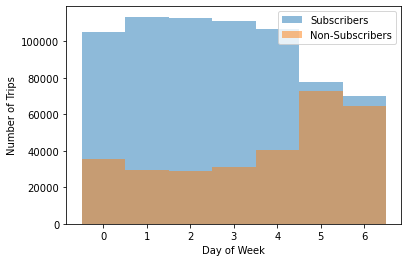

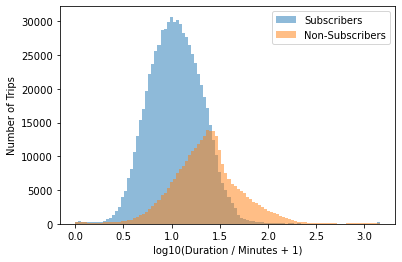

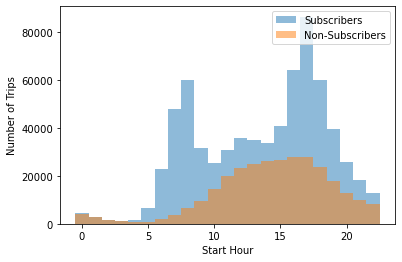

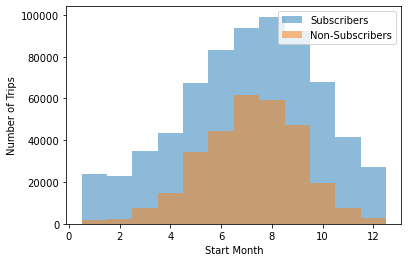

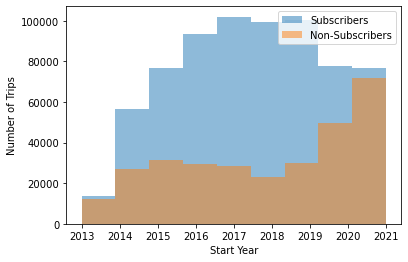

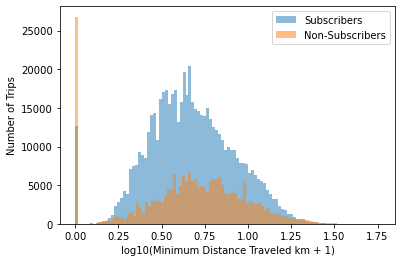

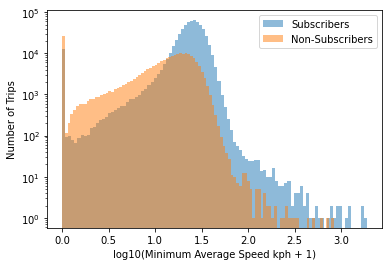

In [192]:
'distributions of trip day of week for subscribers and non-subscribers'

plt.hist(trips[trips['is_subscriber'] == 1]['start_day_of_week'],alpha=0.5,bins=np.arange(8)-0.5,color='tab:blue',label='Subscribers')
plt.hist(trips[trips['is_subscriber'] == 0]['start_day_of_week'],alpha=0.5,bins=np.arange(8)-0.5,color='tab:orange',label='Non-Subscribers')
plt.ylabel('Number of Trips')
plt.xlabel('Day of Week')
plt.legend(loc='upper right')
plt.show()

'distributions of trip durations for subscribers and non-subscribers'

plt.hist(np.log10(trips[trips['is_subscriber'] == 1]['duration_minutes'] + 1),alpha=0.5,bins=100,color='tab:blue',label='Subscribers')
plt.hist(np.log10(trips[trips['is_subscriber'] == 0]['duration_minutes'] + 1),alpha=0.5,bins=100,color='tab:orange',label='Non-Subscribers')
plt.ylabel('Number of Trips')
plt.xlabel('log10(Duration / Minutes + 1)')
plt.legend(loc='upper right')
plt.show()

'distributions of trip start hours for subscribers and non-subscribers'

plt.hist(trips[trips['is_subscriber'] == 1]['start_hour'],alpha=0.5,bins=np.arange(24)-0.5,color='tab:blue',label='Subscribers')
plt.hist(trips[trips['is_subscriber'] == 0]['start_hour'],alpha=0.5,bins=np.arange(24)-0.5,color='tab:orange',label='Non-Subscribers')
plt.ylabel('Number of Trips')
plt.xlabel('Start Hour')
plt.legend(loc='upper right')
plt.show()

'distributions of trip start months for subscribers and non-subscribers'

plt.hist(trips[trips['is_subscriber'] == 1]['start_month'],alpha=0.5,bins=np.arange(1,14)-0.5,color='tab:blue',label='Subscribers')
plt.hist(trips[trips['is_subscriber'] == 0]['start_month'],alpha=0.5,bins=np.arange(1,14)-0.5,color='tab:orange',label='Non-Subscribers')
plt.ylabel('Number of Trips')
plt.xlabel('Start Month')
plt.legend(loc='upper right')
plt.show()

'distributions of trip start years for subscribers and non-subscribers'

plt.hist(trips[trips['is_subscriber'] == 1]['start_year'],alpha=0.5,bins=9,color='tab:blue',label='Subscribers')
plt.hist(trips[trips['is_subscriber'] == 0]['start_year'],alpha=0.5,bins=9,color='tab:orange',label='Non-Subscribers')
plt.ylabel('Number of Trips')
plt.xlabel('Start Year')
plt.legend(loc='upper right')
plt.show()

'lel'

plt.hist(np.log10(trips[(trips['is_subscriber'] == 1) & (trips['min_distance_km'] != '')]['min_distance_km'].astype(float) + 1),alpha=0.5,bins=100,color='tab:blue',label='Subscribers')
plt.hist(np.log10(trips[(trips['is_subscriber'] == 0) & (trips['min_distance_km'] != '')]['min_distance_km'].astype(float) + 1),alpha=0.5,bins=100,color='tab:orange',label='Non-Subscribers')
plt.ylabel('Number of Trips')
plt.xlabel('log10(Minimum Distance Traveled km + 1)')
plt.legend(loc='upper right')
plt.show()

'lel'

plt.hist(np.log10(trips[(trips['is_subscriber'] == 1) & (trips['min_average_speed_kph'] != '')]['min_average_speed_kph'].astype(float) + 1),alpha=0.5,bins=100,log=True,color='tab:blue',label='Subscribers')
plt.hist(np.log10(trips[(trips['is_subscriber'] == 0) & (trips['min_average_speed_kph'] != '')]['min_average_speed_kph'].astype(float) + 1),alpha=0.5,bins=100,log=True,color='tab:orange',label='Non-Subscribers')
plt.ylabel('Number of Trips')
plt.xlabel('log10(Minimum Average Speed kph + 1)')
plt.legend(loc='upper right')
plt.show()